In [1]:
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(7) # Seed 고정

In [3]:
train = pd.read_csv("./../DAT/train.csv")
train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


In [4]:
print(train.shape)

(84406, 20)


In [5]:
#결측치 확인
print(train.isnull().sum())
train.describe()

ID         0
월          0
요일         0
시간         0
소관경찰서      0
소관지역       0
사건발생거리     0
강수량(mm)    0
강설량(mm)    0
적설량(cm)    0
풍향         0
안개         0
짙은안개       0
번개         0
진눈깨비       0
서리         0
연기/연무      0
눈날림        0
범죄발생지      0
TARGET     0
dtype: int64


,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

In [7]:
# 범죄발생지의 등장 빈도를 확인하는 코드입니다.  
train['범죄발생지'].value_counts()

주거지      36077
차도       25879
인도        6437
편의점       4835
주차장       3262
식당        1806
백화점       1493
주유소       1324
공원         736
학교         728
약국         653
호텔/모텔      591
병원         453
은행         132
Name: 범죄발생지, dtype: int64

종속변수 분포 확인

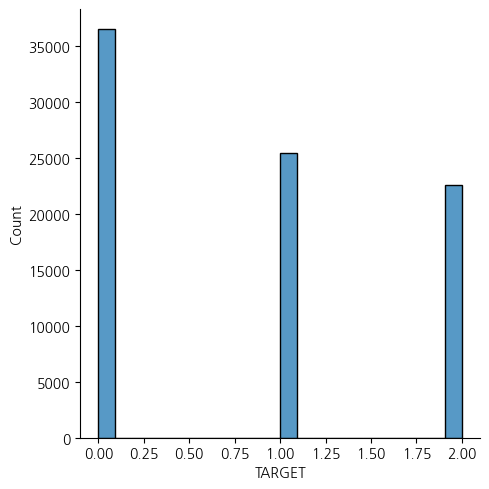

In [8]:
sns.displot(x = "TARGET", data = train)

TARGET 피처의 값은 [0 : 강도, 1 : 절도, 2 : 상해] 로 인코딩되어 있습니다  
강도 데이터가 상대적으로 남은 두 데이터보다 많은 것을 확인할 수 있습니다.

전체 데이터 분포 확인  
위에서 확인한 TARGET 변수를 제외하고 각 피처의 분포를 확인하겠습니다.

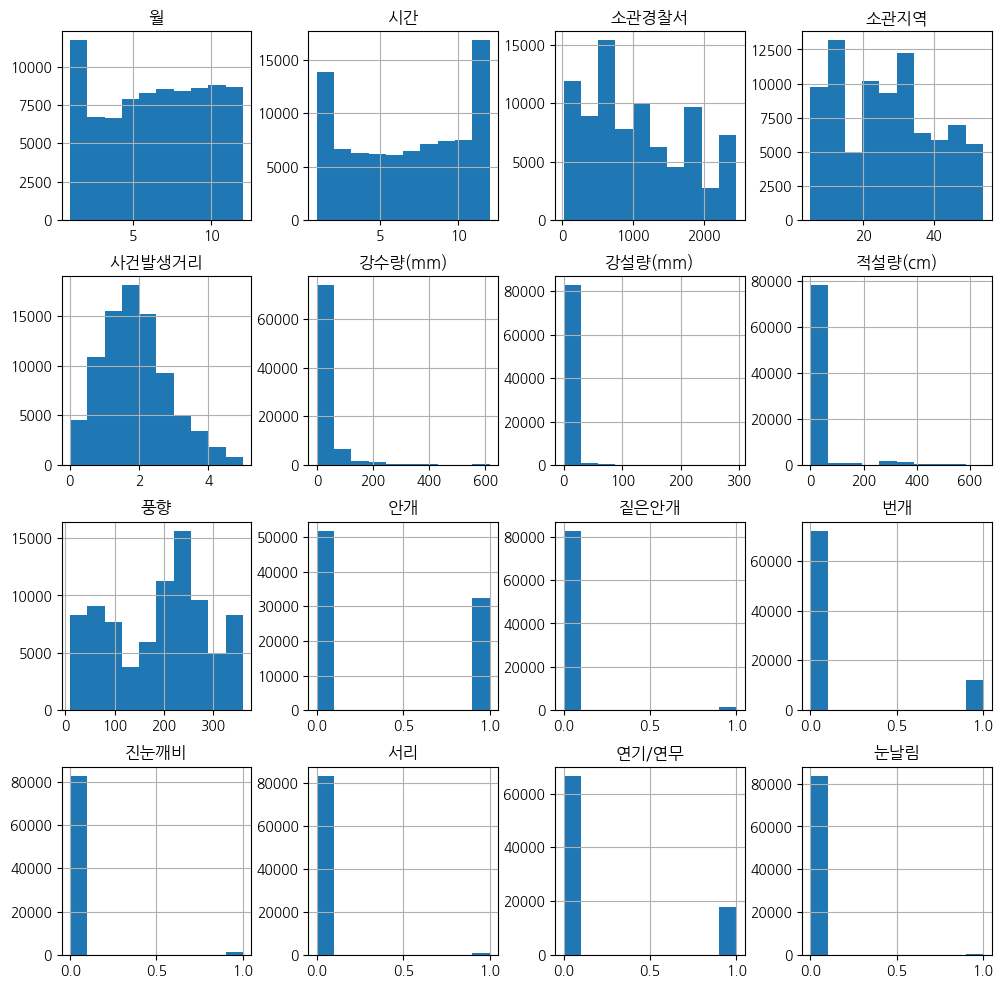

In [9]:
except_target = train.drop('TARGET', axis = 1)
except_target.hist(figsize = (12,12))
plt.show()

In [10]:
print(train["서리"].value_counts())
print("\n")
print(train["진눈깨비"].value_counts())
print("\n")
print(train["짙은안개"].value_counts())
print("\n")
print(train["눈날림"].value_counts())

0.0    83540
1.0      866
Name: 서리, dtype: int64


0.0    82690
1.0     1716
Name: 진눈깨비, dtype: int64


0.0    82900
1.0     1506
Name: 짙은안개, dtype: int64


0.0    83653
1.0      753
Name: 눈날림, dtype: int64


####  시간대별 발생 범죄 빈도 확인

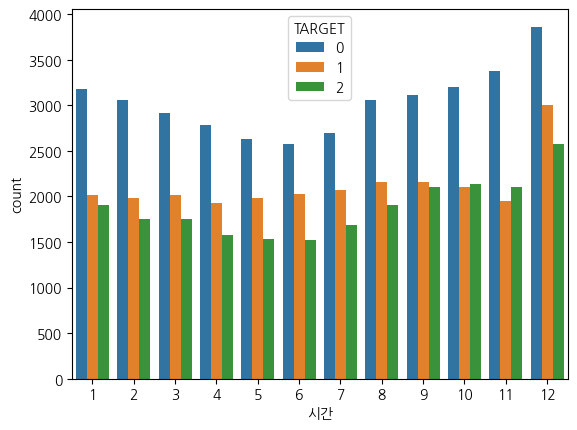

In [16]:
sns.countplot(x = "시간", hue = "TARGET", data = train)
plt.show()

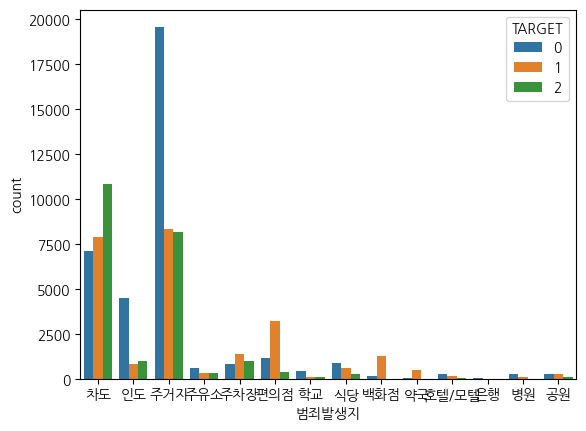

In [43]:
sns.countplot(x = "범죄발생지", hue = "TARGET", data = train)
plt.show()

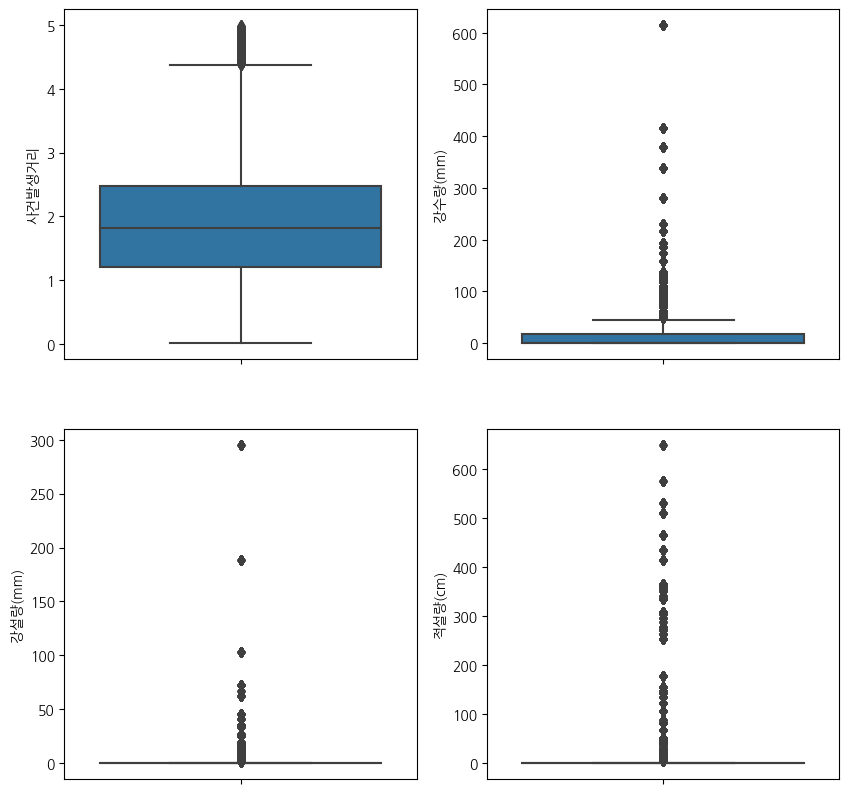

In [44]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y = train['사건발생거리'], ax = axes[0][0])
sns.boxplot(y = train['강수량(mm)'], ax = axes[0][1])

sns.boxplot(y = train['강설량(mm)'], ax = axes[1][0])
sns.boxplot(y = train['적설량(cm)'], ax = axes[1][1])

plt.show()

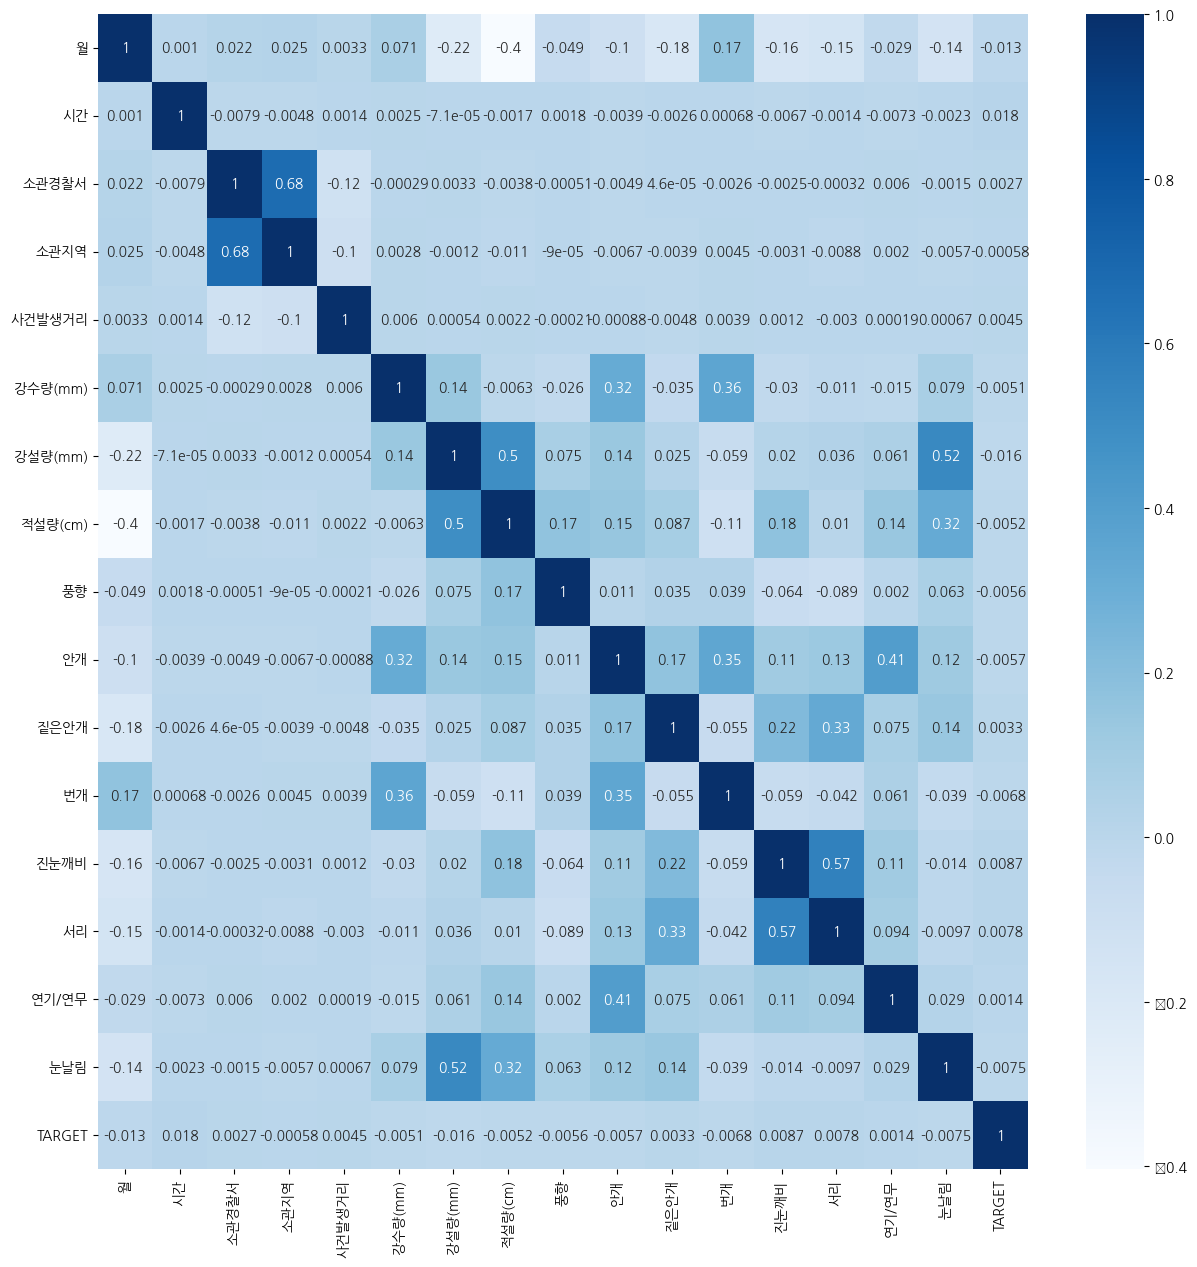

In [45]:
plt.figure(figsize = (15,15), dpi = 100)
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()